In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose # tsa = time series analysis

# Algoritmo ARIMA
from pmdarima.arima import auto_arima # ! pip install pmdarima

##  Carregamento da base de dados

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
# pandas.core.frame.DataFrame

In [3]:
dataset.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


No formato da base de dados, as datas estão no formato de `object` do __Python__. Converteremos essa coluna para objetos `datetime` criando um parser de datas no formato `'%Y-%m'` em uma função lambda. Essa função lambda será utilizada para converter o tipo dos valores da coluna 'Month'.

In [5]:
# Parser para as datas
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

In [6]:
# converter automaticamente strings de datas em objetos datetime

dataset = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month',  date_parser=dateparse)

C:\Users\VictorCampos\AppData\Local\Temp\ipykernel_19344\770129242.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month',  date_parser=dateparse)


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
type(dataset)

pandas.core.frame.DataFrame

Ainda temos aqui um DataFrame mas agora com os Indices sendo instâncias do `datetime`. A construção da série temporal então é feita da forma abaixo.

In [9]:
time_series = dataset['#Passengers']

In [10]:
type(time_series)

pandas.core.series.Series

## Exploração da série temporal

In [11]:
time_series.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
time_series.values

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [13]:
# Series.__getitem__ treating keys as positions is deprecated.>>>> time_series[1]
# In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
time_series.iloc[1]

118

In [14]:
time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [15]:
time_series[datetime(1949,2,1)]

118

In [16]:
time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [17]:
# Janeiro a Julho
time_series['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [18]:
time_series[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [19]:
start_date, end_date = time_series.index.min() , time_series.index.max()

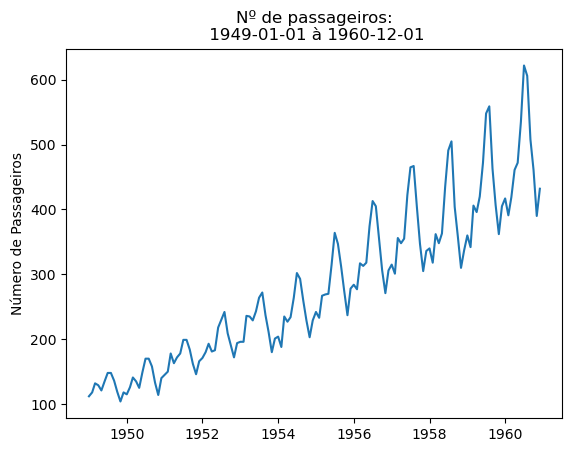

In [20]:
plt.plot(time_series)
plt.ylabel("Número de Passageiros")
plt.title(f"Nº de passageiros:\n {start_date.date()} à {end_date.date()}");

In [21]:
# FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
time_series.resample('YE').sum()

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: YE-DEC, Name: #Passengers, dtype: int64

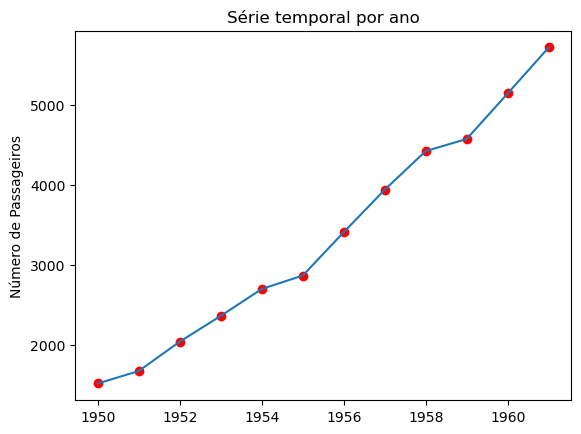

In [22]:
time_series_ano = time_series.resample('YE').sum()
plt.ylabel("Número de Passageiros")
plt.title('Série temporal por ano')
plt.plot(time_series_ano)
plt.scatter(y=time_series_ano, x=time_series_ano.index, color='red')


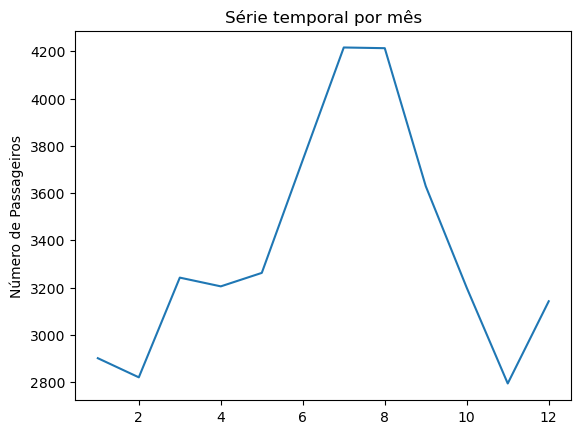

In [23]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.ylabel("Número de Passageiros")
plt.title('Série temporal por mês')
plt.plot(time_series_mes)

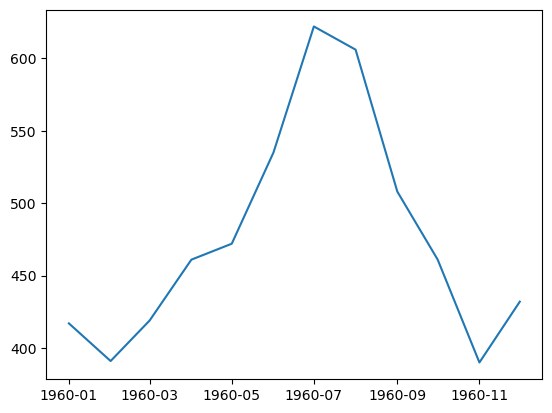

In [24]:
time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)

O ano de 1960 reflete o comportamento geral de toda a amostragem



## Decomposição da série temporal

In [25]:
decomposicao = seasonal_decompose(time_series)

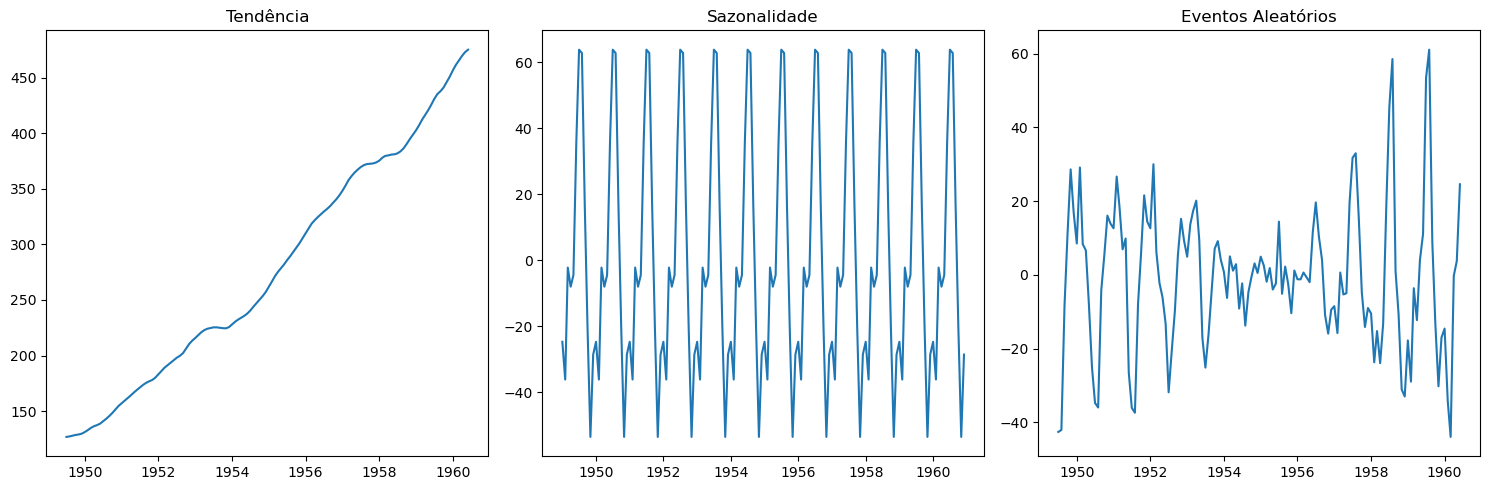

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax1.plot(decomposicao.trend)
ax2.plot(decomposicao.seasonal)
ax3.plot(decomposicao.resid)

ax1.set_title("Tendência")
ax2.set_title("Sazonalidade")
ax3.set_title("Eventos Aleatórios")

plt.tight_layout()

##  Previsões com ARIMA  

__autoregressive integrated moving average__ ou modelo auto-regressivo de médias móveis (ARMA).

In [44]:
# Parâmetors P, Q e D
P, Q, D = 2, 1, 1
order = (P, Q, D) # opcional

model = auto_arima(time_series)

In [46]:
model.order

(4, 1, 3)

In [41]:
# Previsão para daqui a 2 anos
predictions = model.predict(n_periods=24)

In [48]:
predictions

1961-01-01    467.573921
1961-02-01    490.494800
1961-03-01    509.137183
1961-04-01    492.554956
1961-05-01    495.306041
1961-06-01    475.947797
1961-07-01    476.339808
1961-08-01    475.552121
1961-09-01    472.353871
1961-10-01    483.889755
1961-11-01    475.570307
1961-12-01    485.921653
1962-01-01    479.133722
1962-02-01    480.987523
1962-03-01    482.221464
1962-04-01    476.211101
1962-05-01    483.942884
1962-06-01    475.847436
1962-07-01    482.794348
1962-08-01    479.012044
1962-09-01    479.518734
1962-10-01    482.449533
1962-11-01    476.974038
1962-12-01    483.511105
Freq: MS, dtype: float64

## Gráfico das previsões

In [52]:
time_series.size

144

In [ ]:
# Divisão da base de treino e teste
train = time_series[:130] # Primeiros 130 registros
test = time_series[-14: ] # Ultimos 14 registros

In [73]:
### Informações base de treino
print("--------- Base de Treino -----------")
print(train.shape)
print(train.index.min(), train.index.max())

--------- Base de Treino -----------
(130,)
1949-01-01 00:00:00 1959-10-01 00:00:00


In [71]:
print("--------- Base de Teste -----------")
print(test.shape)
print(test.index.min(), test.index.max())

--------- Base de Teste -----------
(14,)
1959-11-01 00:00:00 1960-12-01 00:00:00


In [74]:
model2 = auto_arima(train, suppress_warnings=True)

In [75]:
test.index

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [76]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690512
1959-12-01,334.857450
1960-01-01,342.488591
1960-02-01,375.944531
1960-03-01,424.126292
1960-04-01,473.151456
1960-05-01,510.388398
1960-06-01,527.724267
1960-07-01,523.268354


In [77]:
test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

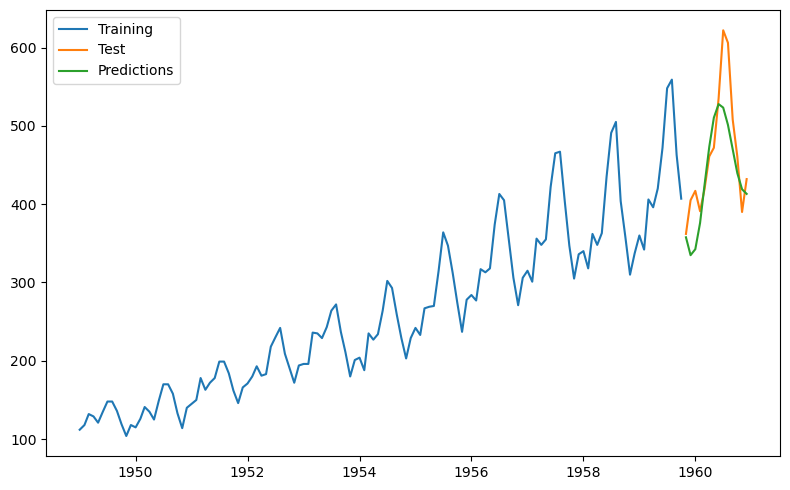

In [89]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')

# Configurando o inset plot
plt.tight_layout()
plt.legend();

As previsões subestimaram o número de passageiros !